In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
import os
import trackpy as tp
import h5py

params_dict = {
    'font.size' : 12,
    'axes.labelsize': 'medium',
    'xtick.top' : True,
    'ytick.right' : True,
    'axes.labelsize' : 16,
    'xtick.labelsize' : 14,
    'ytick.labelsize' : 14,
    'xtick.top' : True,
    'ytick.right' : True,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'legend.frameon' : True,
    'svg.fonttype' : 'none',
    'pdf.fonttype' : 42,
    'savefig.transparent' : True
}
plt.rcParams.update(params_dict)
save_dir = os.path.join(os.getcwd(), 'figs_python')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
print(f' Figures will be saved in this folder:\n {save_dir}')

 Figures will be saved in this folder:
 c:\Users\bipradha\Desktop\nontopo_analys\20nm\figs_python


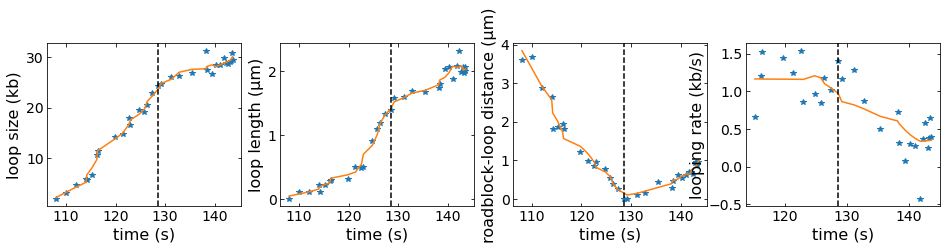

In [21]:
df = pd.read_excel('loopsizes_1_2_diff.xlsx', sheet_name='Sheet1')
fig, axs = plt.subplots(1, 4, figsize=(16, 3))

acq_time = 0.2
frames = acq_time*df['frames'].values
intensity = df['Intensity'].values
distance = 0.1*df.distance.values
enc_f = 643
int_enc = intensity[frames==enc_f*acq_time]
intensity = 24.3*intensity/int_enc
loop_length = 0.11*df['loop length'].values

axs[0].plot(frames, intensity, '*')
axs[0].plot(frames, savgol_filter(intensity, 5, 1))
axs[0].axvline(enc_f*acq_time, ls='--', color='k')

n = 5
int_diff = intensity[n:] - intensity[:-n]
frame_diff = frames[n:] - frames[:-n]
rate = int_diff/frame_diff
rate_smooth = savgol_filter(rate, 13, 1)
axs[3].plot(frames[n:], rate, '*')
axs[3].plot(frames[n:], rate_smooth, '-')
axs[3].axvline(enc_f*acq_time, ls='--', color='k')

axs[2].plot(frames, distance, '*')
axs[2].plot(frames, savgol_filter(distance, 5, 1), '-')
axs[2].axvline(enc_f*acq_time, ls='--', color='k')

axs[1].plot(frames, loop_length, '*')
axs[1].plot(frames, savgol_filter(loop_length, 5, 1), '-')
axs[1].axvline(enc_f*acq_time, ls='--', color='k')

axs[0].set_xlabel('time (s)')
axs[1].set_xlabel('time (s)')
axs[2].set_xlabel('time (s)')
axs[3].set_xlabel('time (s)')

axs[0].set_ylabel('loop size (kb)')
axs[3].set_ylabel('looping rate (kb/s)')
axs[2].set_ylabel('roadblock-loop distance (μm)')
axs[1].set_ylabel('loop length (μm)')


plt.savefig(os.path.join(save_dir, 'rateVsEncounter.svg'))

In [207]:
# _bool = np.logical_and((frames < 143/acq_time), (frames > 130/acq_time))
24.3*intensity/int_enc

array([ 1.87266055,  3.10232738,  4.61477064,  5.72944954,  5.70715596,
        6.59889908, 10.59531627, 11.33452438, 14.09775471, 14.67856108,
       17.99913085, 16.47378078, 19.47520039, 19.17247706, 20.5851859 ,
       22.87203766, 24.3       , 24.60741671, 26.10695316, 26.19495413,
       26.85789474, 31.31778368, 27.52670208, 26.7452535 , 28.39732496,
       28.39497827, 29.7795268 , 28.93471753, 28.58271366, 29.10485273,
       29.24682762, 30.82263158, 29.48032352])